In [15]:
import sys
import os.path
import cv2

In [16]:

# Implementar la tarea:
#  1-leer imágenes en dir_dataset_r
#  2-calcular descriptores de imágenes
#  3-crear dir_datos_temporales con: os.makedirs(dir_datos_temporales, exist_ok=True)
#  4-escribir en dir_datos_temporales los descriptores

In [31]:
# crea una lista de imagenes jpg desde una carpeta y sus subcarpetas, solo cuando el nombre de la imagen comienza con 'r':
def get_imagenes(carpeta):
    imagenes = []
    for root, dirs, files in os.walk(carpeta):
        for file in files:
            if file.endswith('.jpg') and file.startswith('r'):
                imagenes.append(os.path.join(root, file))
    return imagenes

jpgs = get_imagenes('dataset_tarea1')
len(jpgs)

14658

In [28]:
# leer imágenes en dir_dataset_r:
#  1-crear lista de archivos de imágenes en dir_dataset_r
path = 'dataset_tarea1'
#find all jpg images in the directory tree:
jpgs = [os.path.join(dirpath, f)
    for dirpath, dirnames, files in os.walk(path)
    for f in files if f.endswith('.jpg') and files.startswith('q')]
print(jpgs[:5])
print(len(jpgs))



AttributeError: 'list' object has no attribute 'startswith'

In [32]:
# get hog descriptor for all images in jpgs:
hog = cv2.HOGDescriptor()
hog_descriptors = []

#N= 1000
N= len(jpgs)

for jpg in jpgs[0:N]:
    #count iterations and print:
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 128))
    hog_descriptors.append(hog.compute(img))
    if jpgs.index(jpg) % 100 == 0:
        print(jpgs.index(jpg))

hog_descriptors[0].shape

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600


(3780,)

In [34]:
#crear dir_datos_temporales con: os.makedirs(dir_datos_temporales, exist_ok=True)
dir_datos_R = 'datos_R'
os.makedirs(dir_datos_R, exist_ok=True)

#escribir un archivo csv con los descriptores en dir_datos_temporales y el nombre del archivo .jpg:

import csv

with open(dir_datos_R + '/descriptores.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    for i in range(N):
        writer.writerow([jpgs[i], list(hog_descriptors[i])])



In [35]:
#leer el archivo csv y mostrar los descriptores de la primera imagen:

import csv

with open(dir_datos_R + '/descriptores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        print(row[0])
        print(row[1])
        break



dataset_tarea1/dataset_a/r/r1571.jpg
[0.04194113, 0.26943514, 0.26943514, 0.13844864, 0.044628397, 0.0027565015, 0.00037095425, 0.0004205637, 0.003673102, 0.21126783, 0.26943514, 0.24592099, 0.09043108, 0.06036281, 0.035792194, 0.04440727, 0.11712195, 0.1393714, 0.014297625, 0.21718569, 0.24225092, 0.26943514, 0.17127682, 0.15021719, 0.15321925, 0.08673398, 0.028830307, 0.15706375, 0.26943514, 0.22634514, 0.13218443, 0.11275054, 0.06168718, 0.18089555, 0.26752302, 0.23256993, 0.19512503, 0.20682275, 0.09623089, 0.052379724, 0.08046758, 0.06797436, 0.104587875, 0.22048423, 0.19235267, 0.23636715, 0.24497378, 0.20756008, 0.08688691, 0.11452508, 0.084859386, 0.12911755, 0.23709022, 0.24497378, 0.16475405, 0.24497378, 0.12400687, 0.024741694, 0.057320353, 0.042128336, 0.13617176, 0.24497378, 0.17812663, 0.20314184, 0.24497378, 0.24497378, 0.10401413, 0.13778009, 0.07996668, 0.10815797, 0.2029817, 0.09191758, 0.20665252, 0.23563635, 0.14020747, 0.099516526, 0.14883354, 0.20360093, 0.1590365

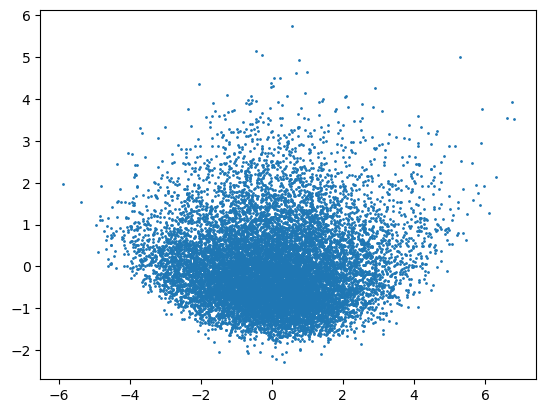

In [36]:
#hacer analisis pca sobre los descriptores que estan en la lista hog_descriptors:

import numpy as np
from sklearn.decomposition import PCA

hog_descriptors = np.array(hog_descriptors)
hog_descriptors = hog_descriptors.reshape(N, 3780)

pca = PCA(n_components=2)
pca.fit(hog_descriptors)
hog_descriptors_pca = pca.transform(hog_descriptors)

hog_descriptors_pca.shape

#plot pca results:

import matplotlib.pyplot as plt

plt.scatter(hog_descriptors_pca[:, 0], hog_descriptors_pca[:, 1], s=1)
plt.show()
